In [1]:
file_path = "/Users/anoushka/Documents/Python Practice/Heart Disease.csv"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv(file_path,encoding='latin-1',header= 0)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- age : the age of the individual

- sex: gender of individaul (male = 1, female = 0)

- cp: type of chest pain

- trestbps: resting blood preasure

- chol: serum cholesterol

- fbs: fasting blood sugar (1 = true, 0 = false)

- restecg: resting electro cardiographic result (1 = yes, 0 = no)

- thalach: maximum heart rate achieved

- exang: exercised induced angina (1 = yes, 0 = no)

- oldpeak: depression induced by exercise relative to rest

- slope: slope of the peak exercise segment (how much maximum exercise we have done)

- ca: number of major vessels (0 to 3)

- thal: thalasemia levels (3 = normal, 6 = fixed defect, 7 = reversable defect)

- target: having heart disease or not ( 1= yes, 0 = no)



<Axes: xlabel='target', ylabel='count'>

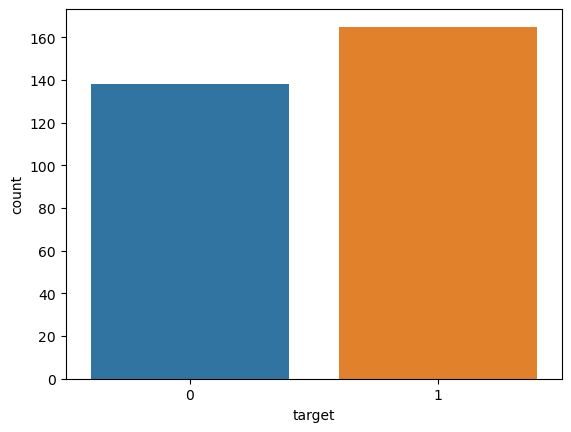

In [3]:
sns.countplot(x='target', data = data) # TO CHECK WEATHER THE DATA SET IS BALANCED OR NOT 

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

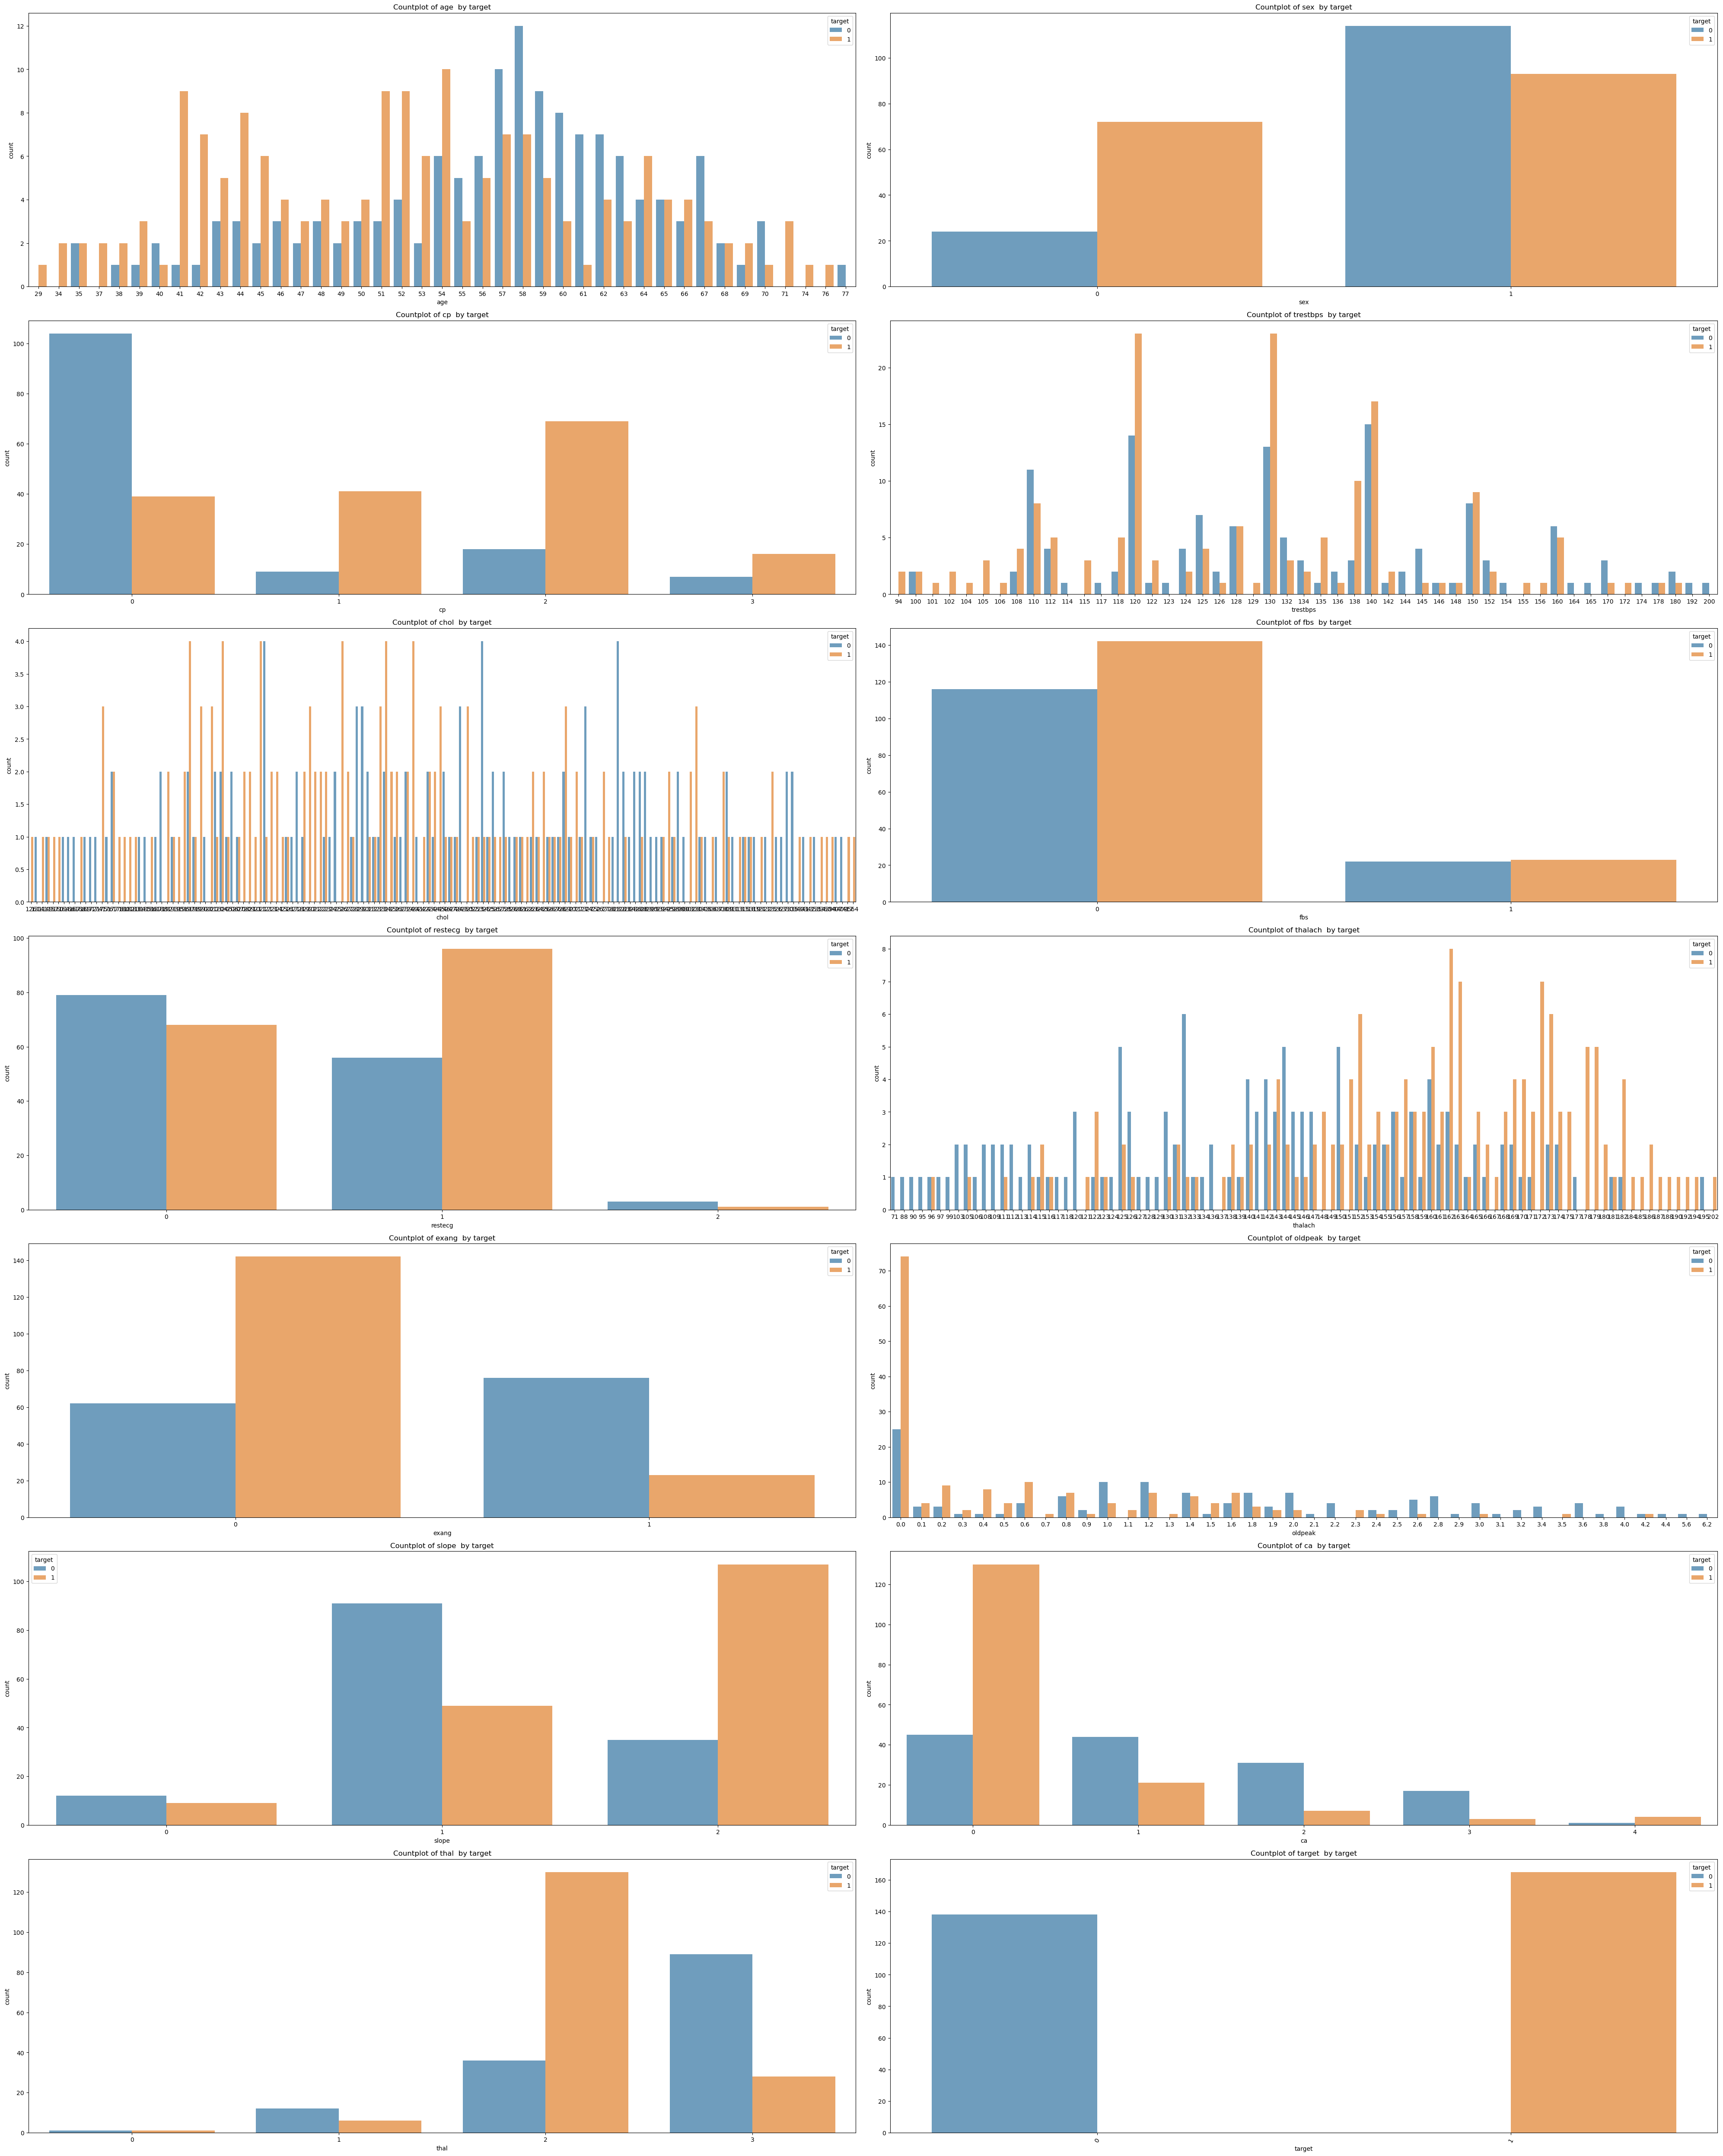

In [9]:
#Bar plots - Check frequency of feature wrt Target Variable 

plt.figure(figsize=[40,50])
features = ['age','sex','cp','trestbps', 
            'chol', 'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
n=1
for f in features:
    plt.subplot(7,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.xticks(rotation = 60)
plt.show()


HW 
- jot all the projects done till now one by one and write down the steps and summary like a storyline --> already emailed a sample for heart disease

- Countplot of age by target: this countplot shows the distbution of those who have heart disease (1) or not (0) based on different ages. The peak age for having heart disease is 54, and for not having heart disease is 58

- Countplot for sex by target: this countplot shows the distbution of those who have heart disease (1) or not (0) based on different sexes (male = 1, female = 0). It shows that there are more females who have heart disease than don't have heart disease, and more males who dont have heart disease than have heart disease. 

- Countplot of fbs by target: this countplot shows the distbution of those who have heart disease (1) or not (0) based on if they have been recorded with fasting blood surgar or not ( 1= yes, 0 = no). For those recorded without fbs, there are more individuals with heart disease than not, and for those recorded with fbs, the amount of idnivudals that do and do not have heart disease are roughly equal (there is a little more of those with heart disease). 

- Countplot of cp by target: this countplot shows the distbution of those who have heart disease (1) or not (0) based on the type of chest pain they have. If they have a chest pain of 0 ( not suffering from chest pain) there is a significnaly greater amount (bulk)  of indviduals who don't have heart disease than do. If they have a chest pain of 1 there are more individuals who are suffereing form heart disease than not suffering. If they have a chest pain of 2, there are EVEN more individuals who are suffereing form heart disease than not suffering. If they have a chest pain of 3, there are more idnviduals who are suffereing form heart diseaset than not, but less than those suffering with a chest pain of 2. 

- Countplot of trestbps by target: this countplot shows the distbution of those who have heart disease (1) or not (0) based on their resting blood preasure. 

In [10]:
# To check how many people have heart disease and how many do not have
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])

In [11]:
print("no Heart Disease %: {:.2f}%".format((countNoDisease / (len(data.target))*100)))

no Heart Disease %: 45.54%


In [12]:
print("Heart Disease %: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Heart Disease %: 54.46%


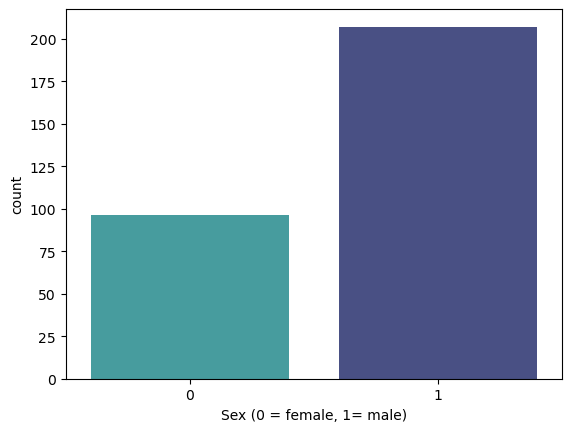

In [14]:
# Check the distribution of sex in our data set (How many Males and Females)
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [15]:
# To check the percentage of males and females 
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])

In [16]:
print("Female %: {:.2f}%".format((countFemale / (len(data.sex))*100)))

Female %: 31.68%


In [17]:
print("Male %: {:.2f}%".format((countMale / (len(data.sex))*100)))

Male %: 68.32%


<Axes: xlabel='sex', ylabel='count'>

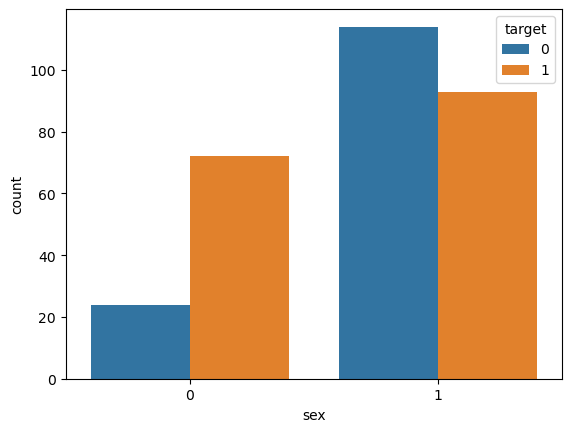

In [18]:
#Visualization of number of those impacted by heart disease in each sex vs heart disease (the target variable)
sns.countplot(x='sex',hue='target',data=data)

This countplot shows that for females, there are SIGNFICANTLY more who suffer from heart disease than do not. For males there are more who are healthy than don't suffer from heart disease, hower tthere are more males who suffer than females (however, this could be due to the fact that there are a greater % of males recorded in the dataset than females). 

In [19]:
# Applying the Groupby function to check the relationship of 'target' variable with the other variables in the data set

data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


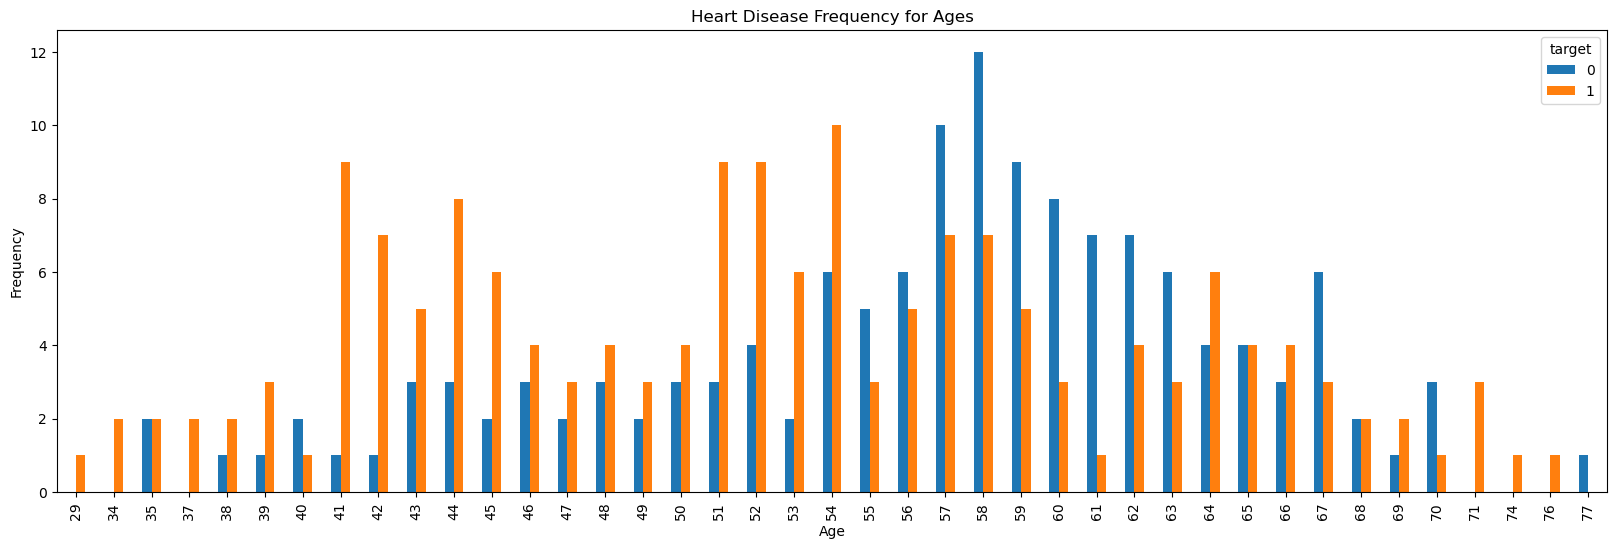

In [20]:
# To check the overall distribution of age vs target --> crosstab

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [21]:
pd.crosstab(data.age,data.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


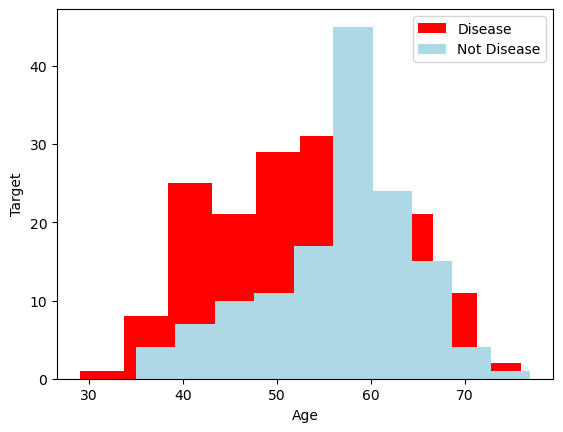

In [23]:
# Histogram of age Vs target

plt.hist(x=data.age[data.target==1],  color ="red")
plt.hist(x=data.age[data.target==0],  color ="lightblue")
#plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Target")
plt.show()


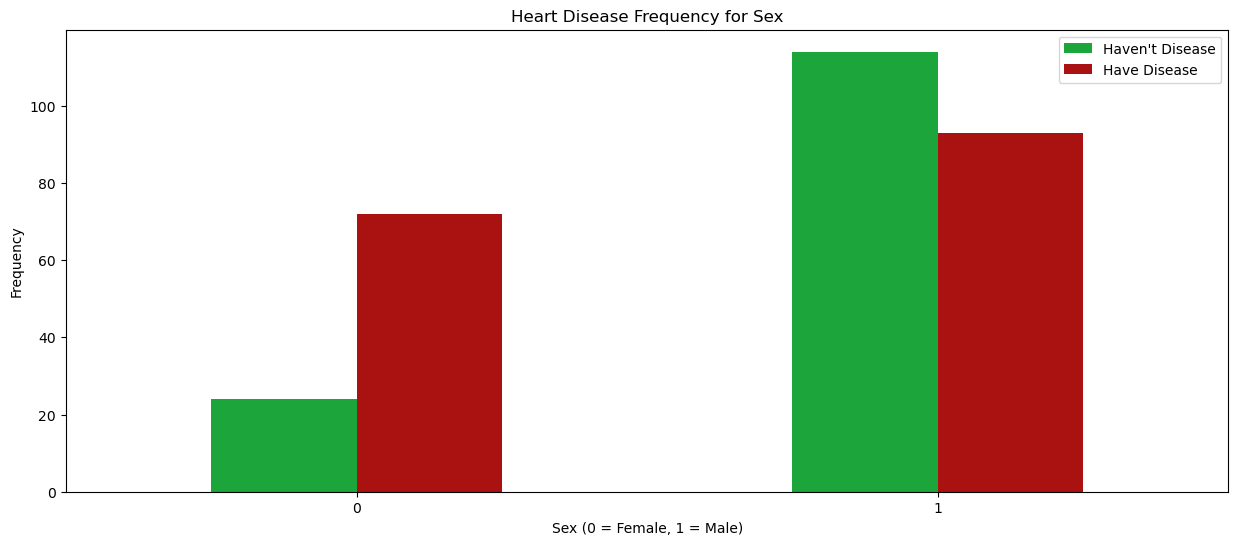

In [25]:
# Overall distribution of male and female with target (irrespective of chest pain)

pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

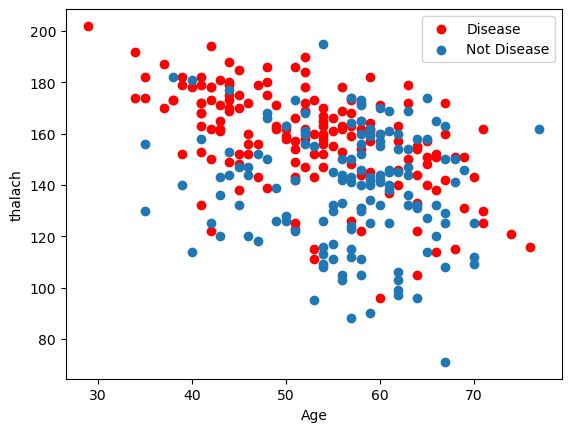

In [26]:
# age Vs thalach with respect to target

plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()